In [1]:
import numpy as np
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df.drop("Resume_html", axis=1, inplace=True)

In [4]:
df.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


<Axes: xlabel='Category'>

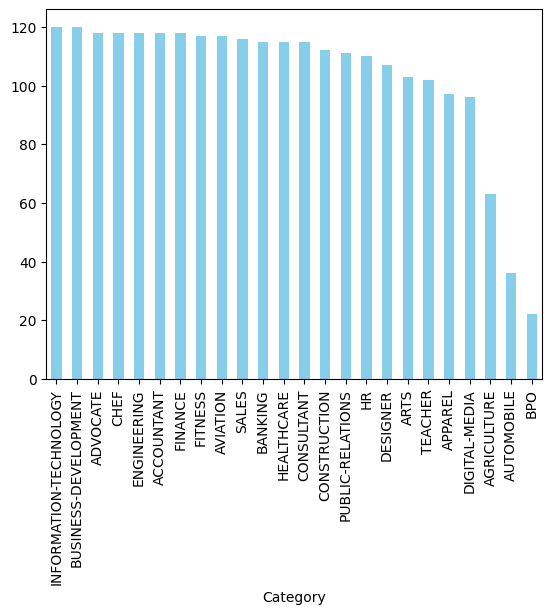

In [5]:
df['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')

In [6]:
sample = df['Resume_str'][0]

In [7]:
sample

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [43]:
nlp = spacy.load("en_core_web_sm")

In [9]:
doc = nlp(sample)

In [10]:
def clean_text(text):
    doc = nlp(text)
    tokens = [
        token.text.lower() for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return " ".join(tokens)

In [11]:
text = clean_text(sample)

In [12]:
doc = nlp(text)

In [13]:
text

'hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company city state helps develop po

In [14]:
for ent in doc.ents:
    print(ent.text, ent.label_)

years DATE
missouri GPE
hilton GPE
months DATE
mar dec PERSON
daily DATE
second ORDINAL
jun jul PERSON
education n ORG
american NORP
jefferson college ORG


In [44]:
ruler = nlp.add_pipe("entity_ruler", before="ner")

In [45]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'entity_ruler',
 'ner']

In [46]:
ruler.add_patterns(data)

In [52]:
doc = nlp(text)

In [53]:
for ent in doc.ents:
    print(ent.text, ent.label_)

marketing SKILL
years DATE
marketing SKILL
missouri GPE
marketing SKILL
segment SKILL
server SKILL
hilton GPE
marketing SKILL
documentation SKILL
marketing SKILL
marketing SKILL
advertising SKILL
design SKILL
months DATE
interaction SKILL
marketing SKILL
mar dec PERSON
data analysis SKILL
accounting SKILL
daily DATE
marketing SKILL
advertising SKILL
commerce SKILL
support SKILL
marketing SKILL
marketing SKILL
swift SKILL
second ORDINAL
jun jul PERSON
education n ORG
business administration SKILL
business administration SKILL
marketing SKILL
advertising SKILL
american NORP
jefferson college ORG
accounting SKILL
advertising SKILL
data analysis SKILL
documentation SKILL
marketing SKILL
marketing SKILL


In [54]:
from spacy import displacy

In [55]:
displacy.render(nlp(text), style="ent", jupyter=True)

In [15]:
import json

In [33]:
data = []
with open("jz_skill_patterns.jsonl") as file:
    for line in file:
        
        data.append(json.loads(line))